In [39]:
# Zomato Bangalore Restaurants - Exploratory Data Analysis (EDA)

# ---------------------------------------------------------------------------
# 1. IMPORTING LIBRARIES
# ---------------------------------------------------------------------------
# Import necessary libraries for data manipulation, analysis, and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings for a cleaner output
warnings.filterwarnings('ignore')

print("Libraries imported successfully.")

Libraries imported successfully.


In [40]:
# ---------------------------------------------------------------------------
# 2. LOADING THE DATASET
# ---------------------------------------------------------------------------
# Load the dataset from the CSV file.
# A try-except block is used to handle the case where the file is not found.
try:
    df_original = pd.read_csv('zomato.csv', encoding='latin-1') # Specify encoding
    df = df_original.copy()  # Work on a copy to preserve the original data
    print("Dataset 'zomato.csv' loaded successfully.")
    print(f"Original dataset shape: {df.shape}")
except FileNotFoundError:
    print("\n---")
    print("Error: 'zomato.csv' not found.")
    print("Please make sure the dataset file is in the same directory as this script.")
    print("---")
    # Exit the script if the data isn't available
    exit()

Dataset 'zomato.csv' loaded successfully.
Original dataset shape: (9551, 21)


In [42]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [43]:
# ---------------------------------------------------------------------------
# 3. DATA CLEANING AND PREPROCESSING
# ---------------------------------------------------------------------------
print("\n--- Starting Data Cleaning and Preprocessing ---")

# --- Step 3.1: Drop Irrelevant Columns ---
# These columns are not required for our high-level analysis.
df.drop(['Restaurant ID', 'Country Code', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Currency', 'Is delivering now', 'Rating color', 'Rating text'], axis=1, inplace=True)
print("Dropped irrelevant columns.")

# --- Step 3.2: Rename Columns for Clarity ---
df.rename(columns={
    'Average Cost for two': 'cost_for_two',
    'Has Online delivery': 'online_order',
    'Has Table booking': 'book_table',
    'Aggregate rating': 'rate',
    'City': 'area',
    'Switch to order menu': 'type' # Renamed 'Switch to order menu' to 'type'
}, inplace=True)
print("Renamed columns for easier access.")

# --- Step 3.3: Clean the 'rate' Column ---
# The 'rate' column is already numeric, so no complex cleaning is needed.
df.dropna(subset=['rate'], inplace=True) # Drop rows where 'rate' is missing
print("Cleaned 'rate' column: handled missing values.")

# --- Step 3.4: Clean the 'cost_for_two' Column ---
# This column is already numeric, so no complex cleaning is needed.
df.dropna(subset=['cost_for_two'], inplace=True) # Drop rows where 'cost_for_two' is missing
print("Cleaned 'cost_for_two' column: handled missing values.")


# --- Step 3.5: Handle Missing Values in 'cuisines' ---
df['Cuisines'].fillna('Not Specified', inplace=True)
print("Filled missing 'Cuisines' with 'Not Specified'.")

# --- Final Check after Cleaning ---
print("\n--- Data Cleaning Complete ---")
print(f"Shape of the cleaned data: {df.shape}")
print("\nData types of cleaned columns:")
print(df.info())


--- Starting Data Cleaning and Preprocessing ---
Dropped irrelevant columns.
Renamed columns for easier access.
Cleaned 'rate' column: handled missing values.
Cleaned 'cost_for_two' column: handled missing values.
Filled missing 'Cuisines' with 'Not Specified'.

--- Data Cleaning Complete ---
Shape of the cleaned data: (9551, 11)

Data types of cleaned columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Restaurant Name  9551 non-null   object 
 1   area             9551 non-null   object 
 2   Address          9551 non-null   object 
 3   Cuisines         9551 non-null   object 
 4   cost_for_two     9551 non-null   int64  
 5   book_table       9551 non-null   object 
 6   online_order     9551 non-null   object 
 7   type             9551 non-null   object 
 8   Price range      9551 non-null   int64  
 9   rate             

In [44]:
# ---------------------------------------------------------------------------
# 4. EXPLORATORY DATA ANALYSIS (EDA) AND VISUALIZATION
# ---------------------------------------------------------------------------
print("\n--- Starting Exploratory Data Analysis and Visualization ---")

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


--- Starting Exploratory Data Analysis and Visualization ---


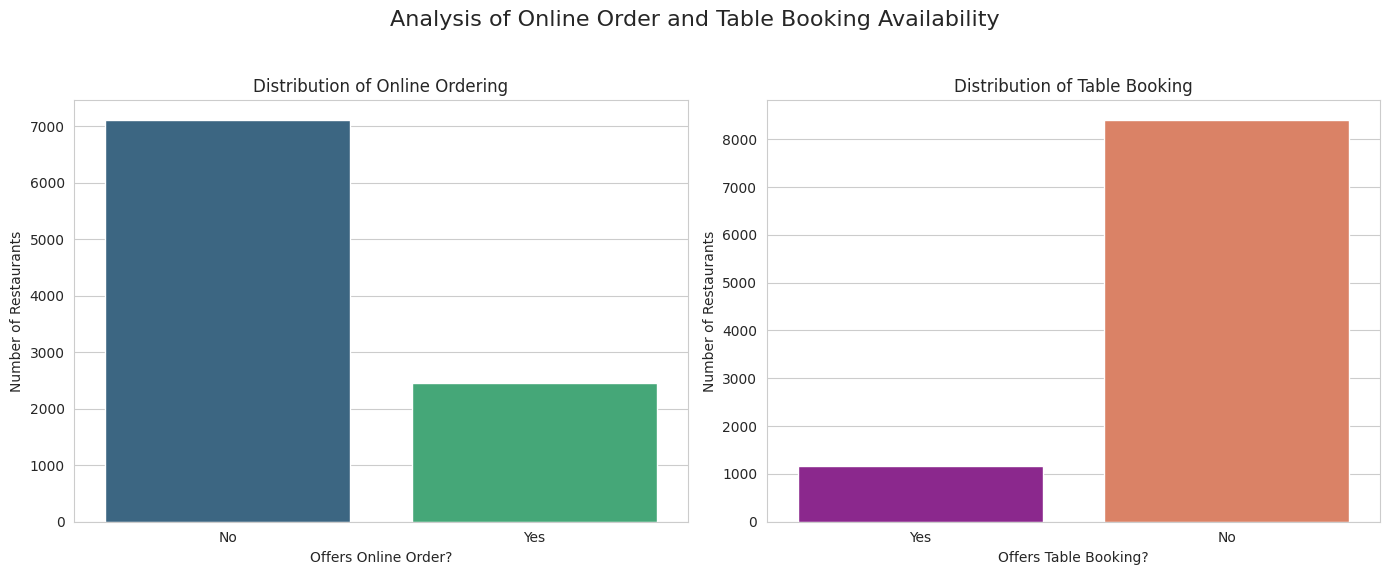

In [45]:
# --- 4.1: Online Orders and Table Booking ---
plt.figure(figsize=(14, 6))
plt.suptitle('Analysis of Online Order and Table Booking Availability', fontsize=16)

# Plot for Online Order
plt.subplot(1, 2, 1)
sns.countplot(x='online_order', data=df, palette='viridis')
plt.title('Distribution of Online Ordering')
plt.xlabel('Offers Online Order?')
plt.ylabel('Number of Restaurants')

# Plot for Table Booking
plt.subplot(1, 2, 2)
sns.countplot(x='book_table', data=df, palette='plasma')
plt.title('Distribution of Table Booking')
plt.xlabel('Offers Table Booking?')
plt.ylabel('Number of Restaurants')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

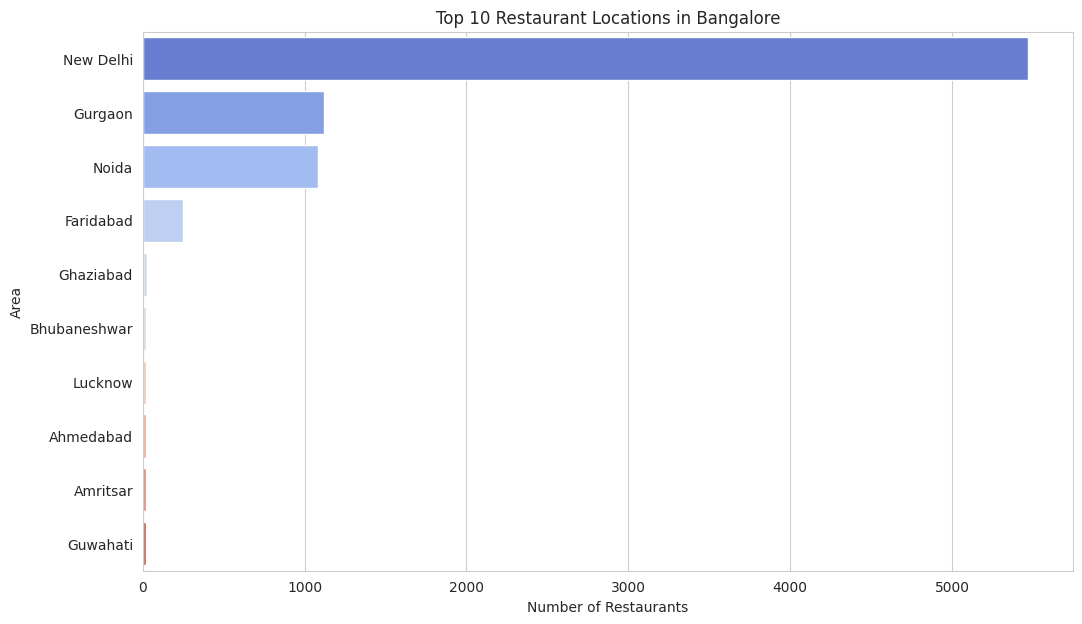

In [46]:
# --- 4.2: Top Restaurant Locations ---
plt.figure(figsize=(12, 7))
sns.countplot(y='area', data=df, order=df['area'].value_counts().iloc[:10].index, palette='coolwarm')
plt.title('Top 10 Restaurant Locations in Bangalore')
plt.xlabel('Number of Restaurants')
plt.ylabel('Area')
plt.show()

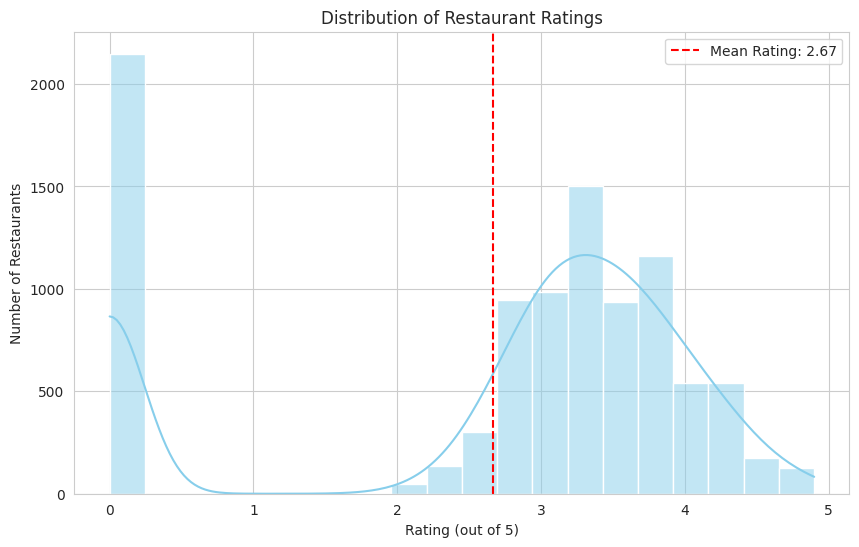

In [47]:
# --- 4.3: Distribution of Restaurant Ratings ---
plt.figure(figsize=(10, 6))
sns.histplot(df['rate'], bins=20, kde=True, color='skyblue')
mean_rating = df['rate'].mean()
plt.axvline(mean_rating, color='red', linestyle='--', label=f'Mean Rating: {mean_rating:.2f}')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating (out of 5)')
plt.ylabel('Number of Restaurants')
plt.legend()
plt.show()

Text(0, 0.5, 'Rating')

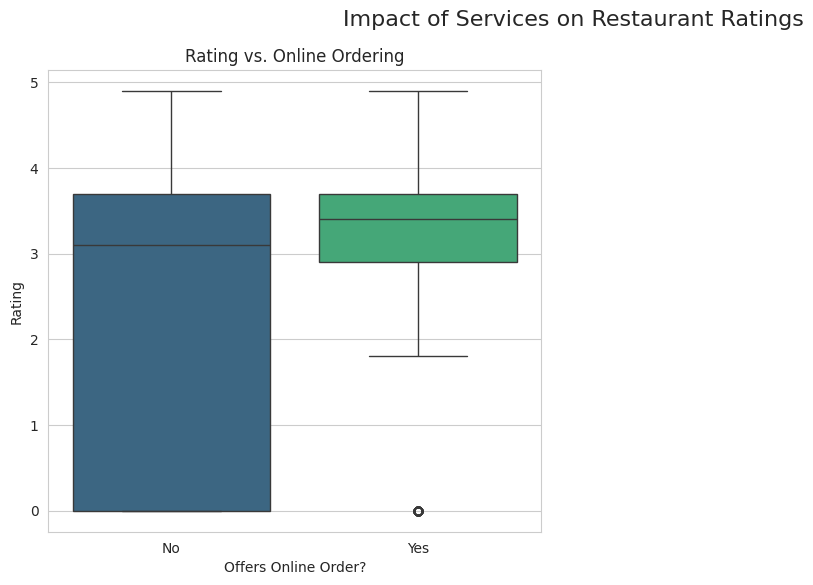

In [48]:
# --- 4.4: Impact of Services on Ratings ---
plt.figure(figsize=(14, 6))
plt.suptitle('Impact of Services on Restaurant Ratings', fontsize=16)

# Box plot for Online Order vs. Rating
plt.subplot(1, 2, 1)
sns.boxplot(x='online_order', y='rate', data=df, palette='viridis')
plt.title('Rating vs. Online Ordering')
plt.xlabel('Offers Online Order?')
plt.ylabel('Rating')

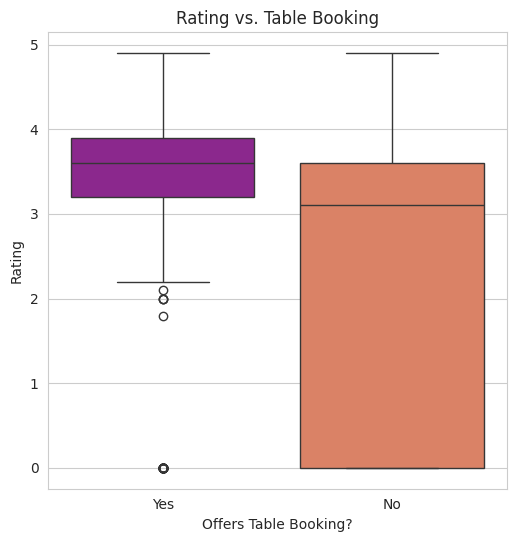

In [49]:
# Box plot for Table Booking vs. Rating
plt.subplot(1, 2, 2)
sns.boxplot(x='book_table', y='rate', data=df, palette='plasma')
plt.title('Rating vs. Table Booking')
plt.xlabel('Offers Table Booking?')
plt.ylabel('Rating')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

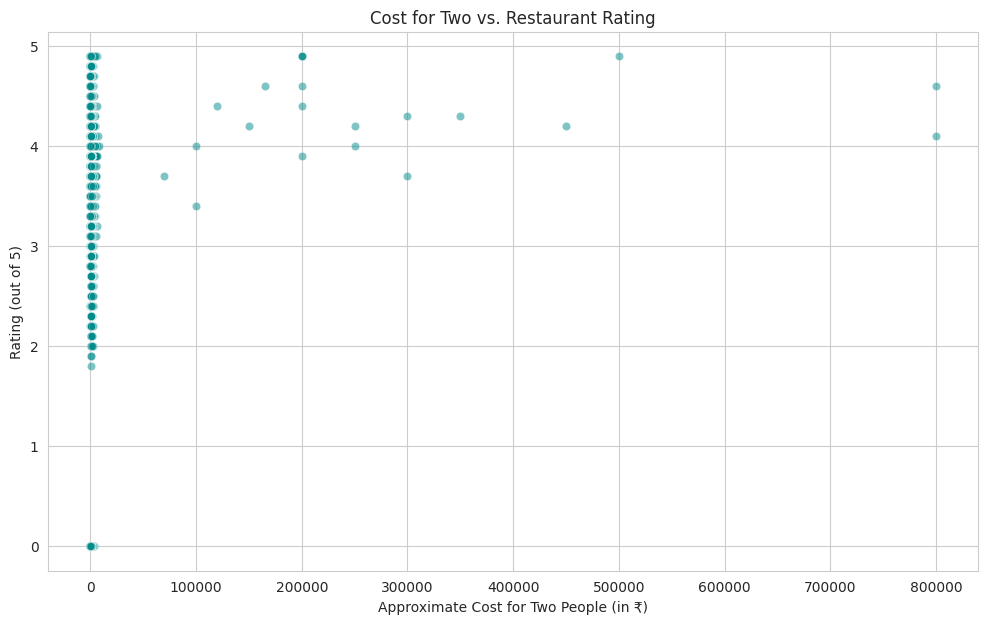

In [50]:
# --- 4.5: Cost vs. Rating ---
plt.figure(figsize=(12, 7))
sns.scatterplot(x='cost_for_two', y='rate', data=df, alpha=0.5, color='darkcyan')
plt.title('Cost for Two vs. Restaurant Rating')
plt.xlabel('Approximate Cost for Two People (in ₹)')
plt.ylabel('Rating (out of 5)')
plt.show()

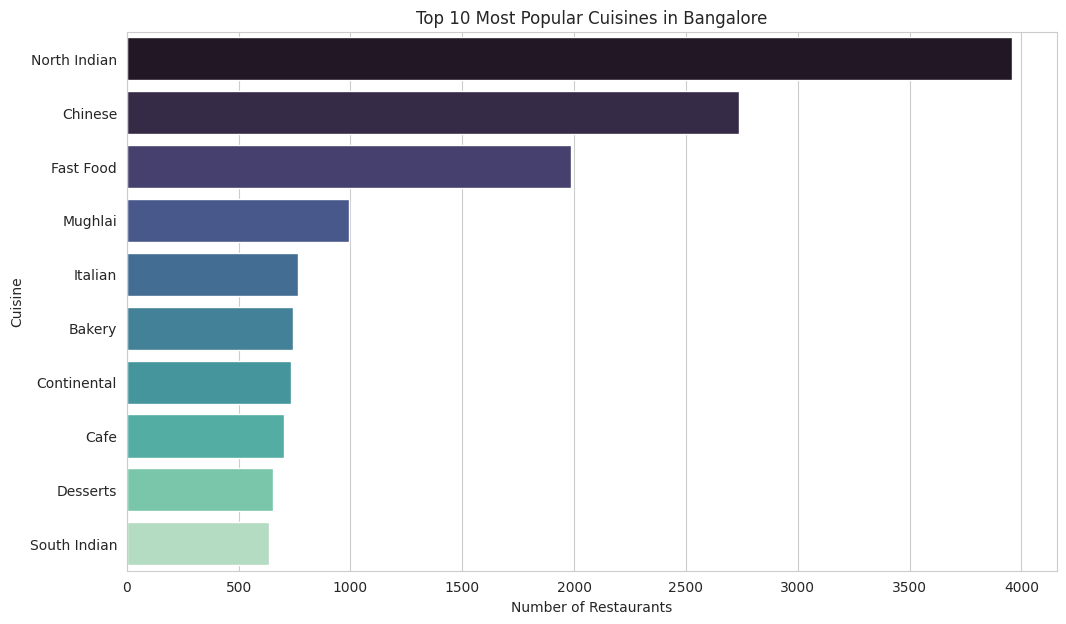


--- EDA and Visualization Complete ---


In [51]:
# --- 4.6: Most Popular Cuisines ---
plt.figure(figsize=(12, 7))
# Splitting the cuisines and counting them
cuisine_counts = df['Cuisines'].str.split(', ').explode().value_counts()
top_cuisines = cuisine_counts.nlargest(10)
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='mako')
plt.title('Top 10 Most Popular Cuisines in Bangalore')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.show()

print("\n--- EDA and Visualization Complete ---")